1.1 Trained data on Yolov8s on 50 epochs!

In [1]:
# Installing Libraries
!pip install ultralytics==8.0.196
!pip install roboflow
!pip install wandb

In [2]:
# Importing libraries
import os
from IPython.display import display, Image
from IPython import display
from ultralytics import YOLO
import wandb
import random

In [3]:
!pwd

/notebooks


In [6]:
# Checking the env and logging into wandb
display.clear_output()
!yolo checks
!wandb login --relogin "2643de84785eb3756d52778c88dbffe263c3eb00"

Ultralytics YOLOv8.0.196 🚀 Python-3.9.16 torch-1.12.1+cu116 CUDA:0 (NVIDIA RTX A4000, 16109MiB)
Setup complete ✅ (8 CPUs, 44.1 GB RAM, 135.9/244.2 GB disk)

OS                  Linux-5.19.0-45-generic-x86_64-with-glibc2.31
Environment         Docker
Python              3.9.16
Install             pip
RAM                 44.08 GB
CPU                 Intel Xeon Gold 5315Y 3.20GHz
CUDA                11.6

matplotlib          ✅ 3.6.1>=3.3.0
numpy               ✅ 1.23.4>=1.22.2
opencv-python       ✅ 4.6.0.66>=4.6.0
pillow              ✅ 9.2.0>=7.1.2
pyyaml              ✅ 5.4.1>=5.3.1
requests            ✅ 2.28.2>=2.23.0
scipy               ✅ 1.12.0>=1.4.1
torch               ✅ 1.12.1+cu116>=1.8.0
torchvision         ✅ 0.13.1+cu116>=0.9.0
tqdm                ✅ 4.64.1>=4.64.0
pandas              ✅ 1.5.0>=1.1.4
seaborn             ✅ 0.12.0>=0.11.0
psutil              ✅ 5.9.4
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1
wandb: Appending key for api.wandb.ai to your 

In [7]:
# Start a new wandb run to track
wandb.init(
    # Set the wandb project where this run will be logged
    project="BH_task",

    # Track hyperparameters and run metadata
    config={
        "task": "detect",
        "mode": "train",
        "model": "yolov8s.pt",
        "data": "/notebooks/data/data.yaml",
        "epochs": 50,
        "imgsz": 640,
        "device": 0
    }
)

# Simulate training
epochs = 50
offset = random.random() / 5
for epoch in range(2, epochs):
    acc = 1 - 2 ** -epoch - random.random() / epoch - offset
    loss = 2 ** -epoch + random.random() / epoch + offset

    # Log metrics to wandb
    wandb.log({"acc": acc, "loss": loss})

# [Optional] Finish the wandb run, necessary in notebooks
wandb.finish()


wandb: Currently logged in as: amananand97. Use `wandb login --relogin` to force relogin


acc,▁▅▇▇█▇███▇█████▇████████████████████████
loss,█▆▃▃▃▁▂▂▂▁▂▁▂▁▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
acc,0.91722
loss,0.0896


In [5]:
from roboflow import Roboflow

# Roboflow API key
api_key = "SqXwZ9H1RIAYVwrE117l"

# Path for the dataset
download_path = "/notebooks/"

# Roboflow instance
rf = Roboflow(api_key=api_key)

# Access project and version
project = rf.workspace("train-yu3wc").project("cad-drawings")
version = project.version(1)

# Creating a download path directory if it doesn't exist
os.makedirs(download_path, exist_ok=True)  # Handles existing directory

# Download the dataset
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to cad-drawings-1 in yolov8:: 100%|██████████| 6448/6448 [00:00<00:00, 6891.40it/s]


In [10]:
# Load a model
model = YOLO("yolov8s.yaml")
model = YOLO("yolov8s.pt")

# Use the model
results = model.train(data="/notebooks/data/data.yaml", epochs=50, imgsz=640, conf=0.7)  # train the model
results = model.val()  # evaluate model performance on the validation set


                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅
train: Scanning /notebooks/data/train/labels.cache... 2446 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2446/2446 [00:00<?, ?it/s]
val: Scanning /notebooks/data/valid/labels.cache... 517 images, 0 backgrounds, 0 corrupt: 100%|██████████| 517/517 [00:00<?, ?it/s]
Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)


Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       1/50      4.91G      1.279      1.399      1.204        532        640: 100%|██████████| 153/153 [00:34<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.40it/s]
                   all        517      14431      0.895      0.432      0.663      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       2/50      5.05G      1.096     0.9083      1.099        664        640: 100%|██████████| 153/153 [00:23<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.65it/s]
                   all        517      14431       0.94      0.453      0.697      0.524

lr/pg0,▃▆████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▃▆████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▃▆████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▁▃▅▅▁▄▅▄▅▃▄▄▅▅▅▂▅▇▃▅▆▆▆▆▆▇▇▆█▆▇▇▇▇▇██▇██
metrics/mAP50-95(B),▁▄▅▅▃▄▅▄▆▄▅▅▆▆▆▄▅▇▄▆▆▇▆▇▇▇▇▇█▇▇▇▇▇▇█████
metrics/precision(B),▁▅▂▅▇▆▆▆▇▆▇█▇▇██▇▇▇▇▆▇▇▆▇▆▆▆▅▅▆▆▅▆▅▅▅▅▅▅
metrics/recall(B),▃▃▆▅▁▄▅▄▅▃▃▃▅▅▄▂▅▇▂▅▆▆▅▆▆▇▇▆▇▆▇▇▇▇▇██▇██
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▆▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁


Ultralytics YOLOv8.0.196 🚀 Python-3.9.16 torch-1.12.1+cu116 CUDA:0 (NVIDIA RTX A4000, 16109MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /notebooks/data/valid/labels.cache... 517 images, 0 backgrounds, 0 corrupt: 100%|██████████| 517/517 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   6%|▌         | 2/33 [00:05<01:28,  2.86s/it]WARNING ⚠️ NMS time limit 1.300s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:17<00:00,  1.84it/s]
                   all        517      14431      0.938      0.682      0.812      0.638
                  door        517       5470      0.959      0.786      0.869      0.681
                window        517       3584      0.943      0.557      0.752      0.514
                  zone        517       5377      0.911      0.701      0.815       0.72
Speed: 0.5ms prepro

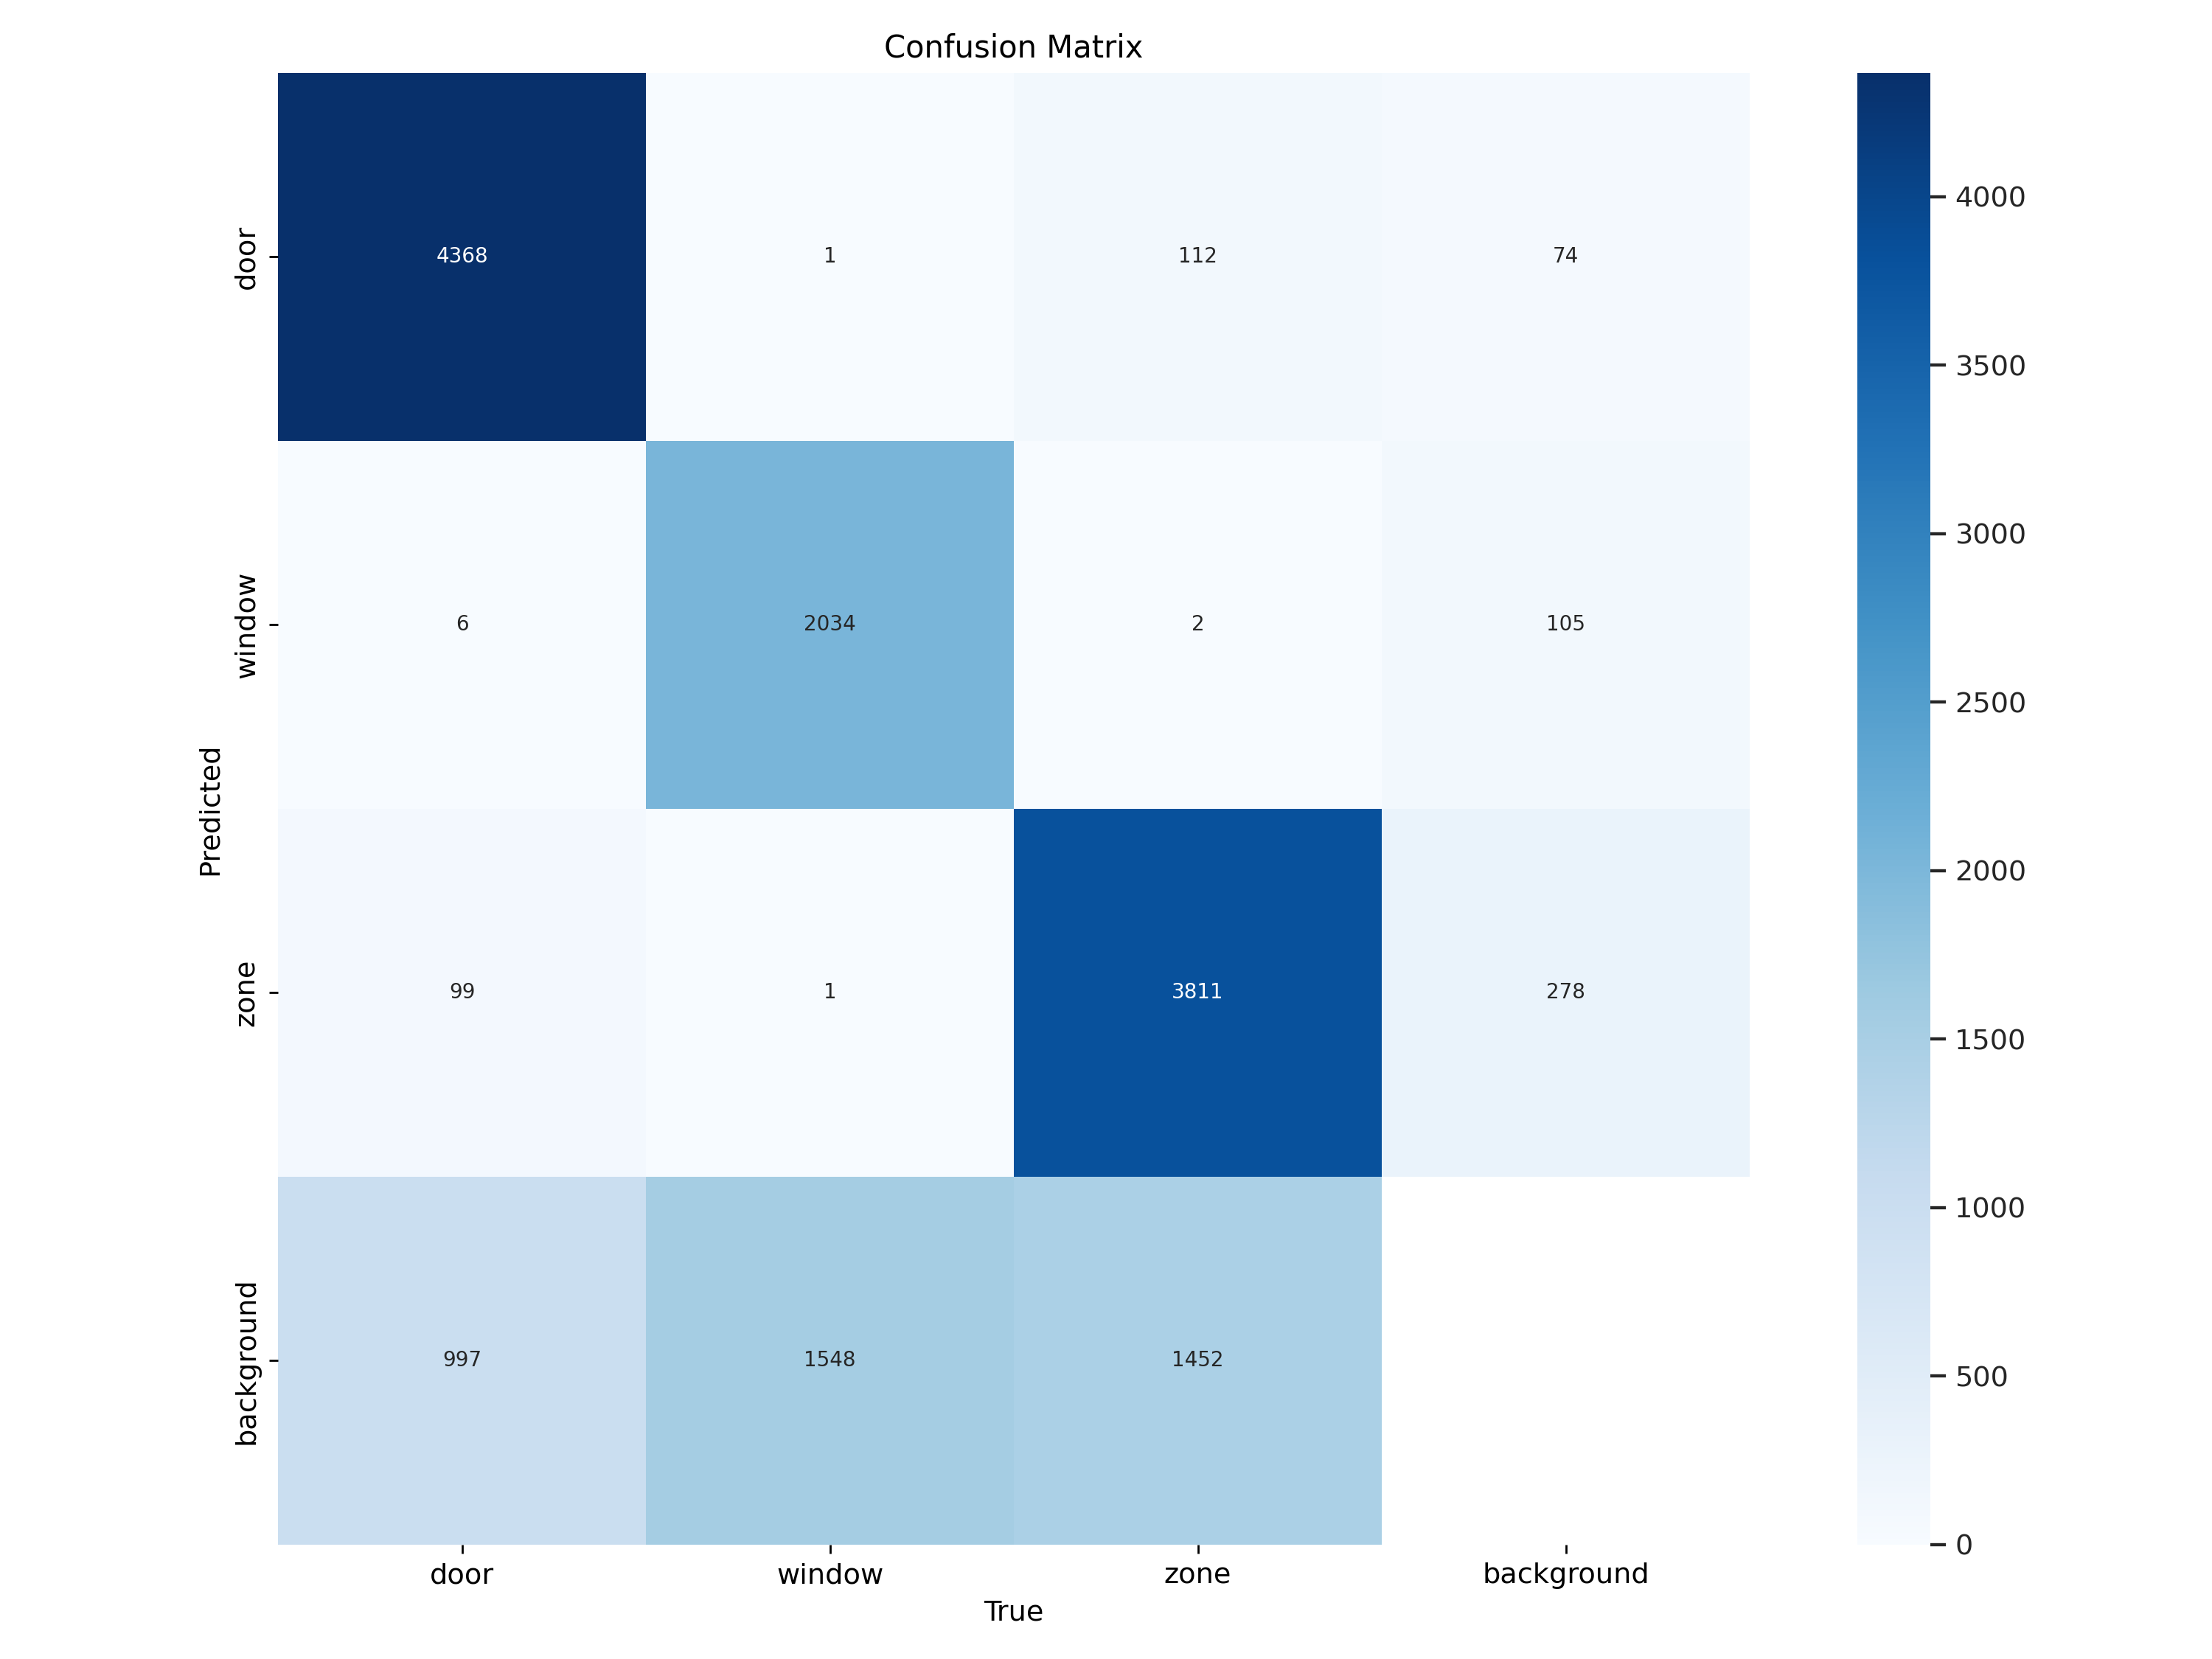

In [22]:
# Printing the Confusion Matrix
Image (filename=f'/notebooks/runs/detect/train4/confusion_matrix.png', width=600)

In [13]:
# Predicting on Test dataset
!yolo task=detect mode=predict model="/notebooks/runs/detect/train4/weights/best.pt" conf=0.6 source="data/test/images"

Ultralytics YOLOv8.0.196 🚀 Python-3.9.16 torch-1.12.1+cu116 CUDA:0 (NVIDIA RTX A4000, 16109MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/255 /notebooks/data/test/images/1010_png.rf.cf3c8ce678e7dc00f7d5f0921f439858.jpg: 640x640 2 doors, 4 zones, 6.7ms
image 2/255 /notebooks/data/test/images/1012_png.rf.fd3d80c9e721a4e8b0c369a9be397af6.jpg: 640x640 2 doors, 2 zones, 7.6ms
image 3/255 /notebooks/data/test/images/1014_png.rf.6b088752e5649eeeb7334ff08996d2a2.jpg: 640x640 7 doors, 5 windows, 6 zones, 8.2ms
image 4/255 /notebooks/data/test/images/1143_png.rf.544ecf6ffbb324793578c26f04af7760.jpg: 640x640 7 doors, 4 windows, 6 zones, 6.4ms
image 5/255 /notebooks/data/test/images/1156_png.rf.d6b44f9ce1e99ca6a440a33c88714242.jpg: 640x640 6 doors, 4 windows, 5 zones, 6.1ms
image 6/255 /notebooks/data/test/images/1165_png.rf.100d7ec198af12c832d20e45bf013990.jpg: 640x640 6 doors, 3 windows, 5 zones, 6.1ms
image 7/255 /notebooks/data/test/images/1166_p